In [1]:
import argparse
import json
import numpy as np
import pandas as pd
import pickle
import shap
import sys
sys.path.append("/path/to/fake-news")

In [12]:
saved_model_path = "../model_checkpoints/random_forest/model.pkl"
feature_names_path = "../model_checkpoints/random_forest/feature_names.pkl"

In [13]:
def compute_impurity_feature_importance(model, feature_names, num_features=35):
    importances = model.model.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    for idx in sorted_idx[:num_features]:
        print(f"{feature_names[idx]} --- {importances[idx]}")

In [14]:
with open(saved_model_path, "rb") as f:
    model = pickle.load(f)
    
with open(feature_names_path, "rb") as f:
    feature_names = pickle.load(f)

In [79]:
with open("../data/processed/val_features.pkl", "rb") as f:
    val_features, val_labels = pickle.load(f)
    
with open("../data/processed/cleaned_val_data.json", "r") as f:
    val_data = json.load(f)

In [15]:
compute_impurity_feature_importance(model, feature_names)

false_count=0 --- 0.01788103750021081
barely_true_count=1 --- 0.013547527016297977
mostly_true_count=0 --- 0.012814332174567926
false_count=1 --- 0.012356274396352049
barely_true_count=0 --- 0.011642340204808786
half_true_count=0 --- 0.011123275790760898
pants_fire_count=0 --- 0.010704431737810377
the --- 0.009264955075530558
mostly_true_count=1 --- 0.009118849790203196
half_true_count=1 --- 0.00812081824119793
in --- 0.00806058304960812
of --- 0.007734625265523087
to --- 0.007070031612018406
pants_fire_count=1 --- 0.0068806431741690426
says --- 0.006082293331787273
on --- 0.005531578965784581
and --- 0.005017675857693454
is --- 0.004935532462653203
for --- 0.004873472099037201
percent --- 0.004706948695127965
that --- 0.004316744798848359
party_affiliation=democrat --- 0.004191352603028584
than --- 0.004165362090882646
has --- 0.003921126743242467
party_affiliation=republican --- 0.0038689632432530757
more --- 0.0038388095768341697
obama --- 0.0037539787018463578
have --- 0.0036307525

In [52]:
shap.initjs()

In [132]:
val_feat_df = pd.DataFrame(val_features.todense(), columns=feature_names)

In [133]:
val_feat_df.head()

,barely_true_count=0,barely_true_count=1,barely_true_count=10,barely_true_count=2,barely_true_count=3,barely_true_count=4,barely_true_count=5,barely_true_count=6,barely_true_count=9,false_count=0,...,zip,zippo,zombie,zombies,zone,zones,zoning,zoo,zuckerberg,zuckerbergs
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
explainer = shap.TreeExplainer(model.model,data=val_feat_df[:70])

In [135]:
shap_values = explainer.shap_values(val_feat_df[:70])

 98%|===================| 137/140 [00:15<00:00]        

In [136]:
explainer.expected_value

array([0.43485714, 0.56514286])

In [137]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0, :], val_feat_df.iloc[0,:])

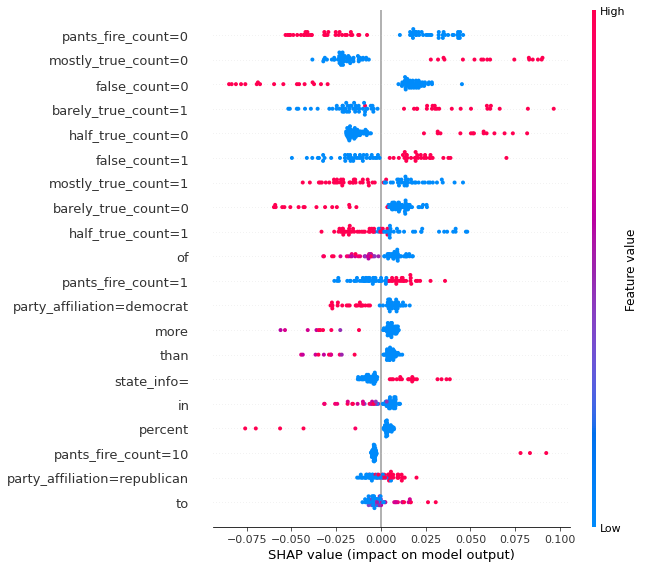

In [138]:
shap.summary_plot(shap_values[0], val_feat_df[:70])

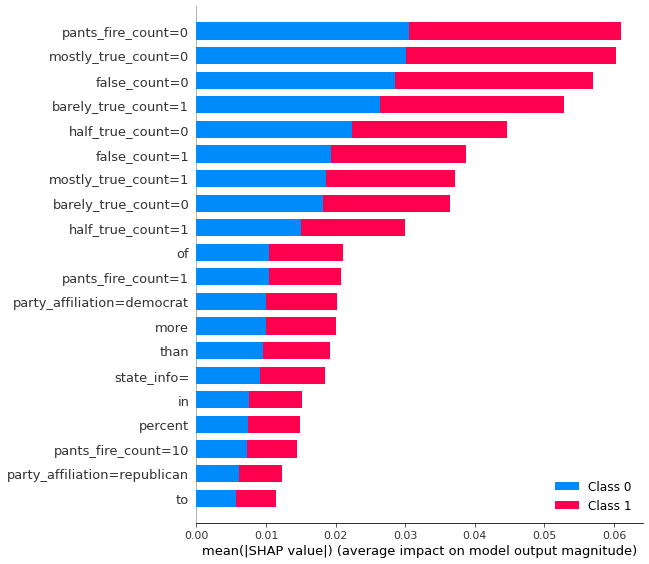

In [139]:
shap.summary_plot(shap_values, val_feat_df[:70], plot_type="bar")

In [127]:
def find_least_confident_incorrect_samples(model, features, labels):
    predicted_proba = model.predict(features)
    predicted_labels = np.argmax(predicted_proba, axis=1)
    incorrect = predicted_labels != labels
    incorrect_idx = [idx for idx, value in enumerate(incorrect) if value]
    incorrect_confidence_diff = [(idx, np.abs(predicted_proba[idx][0] - predicted_proba[idx][1])) for idx in incorrect_idx]
    return sorted(incorrect_confidence_diff, key=lambda x: x[1])

In [130]:
find_least_confident_incorrect_samples(model, val_features, val_labels)

[(56, 0.0),
 (323, 0.0),
 (374, 0.0),
 (431, 0.0),
 (648, 0.0),
 (717, 0.0),
 (840, 0.0),
 (894, 0.0),
 (917, 0.0),
 (948, 0.0),
 (1013, 0.0),
 (1114, 0.0),
 (47, 0.020000000000000018),
 (70, 0.020000000000000018),
 (146, 0.020000000000000018),
 (219, 0.020000000000000018),
 (226, 0.020000000000000018),
 (375, 0.020000000000000018),
 (378, 0.020000000000000018),
 (403, 0.020000000000000018),
 (414, 0.020000000000000018),
 (426, 0.020000000000000018),
 (656, 0.020000000000000018),
 (713, 0.020000000000000018),
 (774, 0.020000000000000018),
 (789, 0.020000000000000018),
 (1021, 0.020000000000000018),
 (1036, 0.020000000000000018),
 (1098, 0.020000000000000018),
 (1151, 0.020000000000000018),
 (1276, 0.020000000000000018),
 (94, 0.040000000000000036),
 (199, 0.040000000000000036),
 (229, 0.040000000000000036),
 (231, 0.040000000000000036),
 (236, 0.040000000000000036),
 (259, 0.040000000000000036),
 (332, 0.040000000000000036),
 (334, 0.040000000000000036),
 (397, 0.040000000000000036),
 

In [141]:
for idx, diff in sorted_confidences[:20]:
    if diff > 0:
        print(val_data[idx], "\n")

{'id': '47', 'statement_json': '4578.json', 'label': True, 'statement': 'Says that In 2009, I saved ratepayers around $500 million by persuading the Council to pursue a less expensive compliance mechanism if the City is required to treat Bull Run drinking water.', 'subject': 'city-budget,city-government,environment,public-health,water', 'speaker': 'amanda-fritz', 'speaker_title': 'portland city commissioner', 'state_info': '', 'party_affiliation': 'democrat', 'barely_true_count': 1.0, 'false_count': 1.0, 'half_true_count': 0.0, 'mostly_true_count': 2.0, 'pants_fire_count': 0.0, 'context': 'in campaign literature', 'justification': '(Does that mean the state would save water ratepayers $100 million to $180 million, depending on how you calculate cost?She came from the political minority, challenged Leonard, and ended up with a 5-0 vote in her favor.'} 

{'id': '70', 'statement_json': '4855.json', 'label': False, 'statement': 'Says Mitt Romney once supported President Obamas health care 